# **Laboratory Exercise-1: Feature Scaling Methods**
## **Data Preprocessing with Different Scaling Techniques on Social Network Ads Dataset**

**AICTE Faculty ID:** 1-3241967546  
**Faculty Name:** Milav Jayeshkumar Dabgar  
**Date:** July 16, 2025

---

### **Objective:**
This laboratory exercise demonstrates comprehensive data preprocessing techniques learned in Laboratory-1, with a special focus on different feature scaling methods applied to the Social Network Ads dataset.

### **Learning Outcomes:**
- Apply complete data preprocessing pipeline
- Understand different feature scaling techniques
- Compare the effects of various scaling methods
- Evaluate model performance with different scaling approaches

---

## **1. Import Required Libraries**

Import all necessary libraries for data preprocessing, feature scaling, visualization, and machine learning.

In [1]:
# Basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing libraries
from sklearn.preprocessing import (StandardScaler, MinMaxScaler, RobustScaler, 
                                 Normalizer, MaxAbsScaler, QuantileTransformer, 
                                 PowerTransformer, LabelEncoder)
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Visualization settings
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)

print("All libraries imported successfully!")

All libraries imported successfully!


## **2. Load and Explore the Dataset**

Load the Social Network Ads dataset and perform comprehensive exploratory data analysis.

In [2]:
# Load the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')

print("="*50)
print("SOCIAL NETWORK ADS DATASET EXPLORATION")
print("="*50)

print(f"\n📊 Dataset Shape: {dataset.shape}")
print(f"📋 Columns: {list(dataset.columns)}")

print("\n🔍 First 10 rows:")
print(dataset.head(10))

print("\n📈 Dataset Info:")
print(dataset.info())

print("\n📊 Statistical Summary:")
print(dataset.describe())

print("\n🎯 Target Variable Distribution:")
print(dataset['Purchased'].value_counts())
print(f"Purchase Rate: {dataset['Purchased'].mean():.2%}")

print("\n❓ Missing Values Check:")
print(dataset.isnull().sum())

SOCIAL NETWORK ADS DATASET EXPLORATION

📊 Dataset Shape: (400, 3)
📋 Columns: ['Age', 'EstimatedSalary', 'Purchased']

🔍 First 10 rows:
   Age  EstimatedSalary  Purchased
0   19            19000          0
1   35            20000          0
2   26            43000          0
3   27            57000          0
4   19            76000          0
5   27            58000          0
6   27            84000          0
7   32           150000          1
8   25            33000          0
9   35            65000          0

📈 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB
None

📊 Statistical Summary:
              Age  EstimatedSalary   Purchased
count  400.000000       4

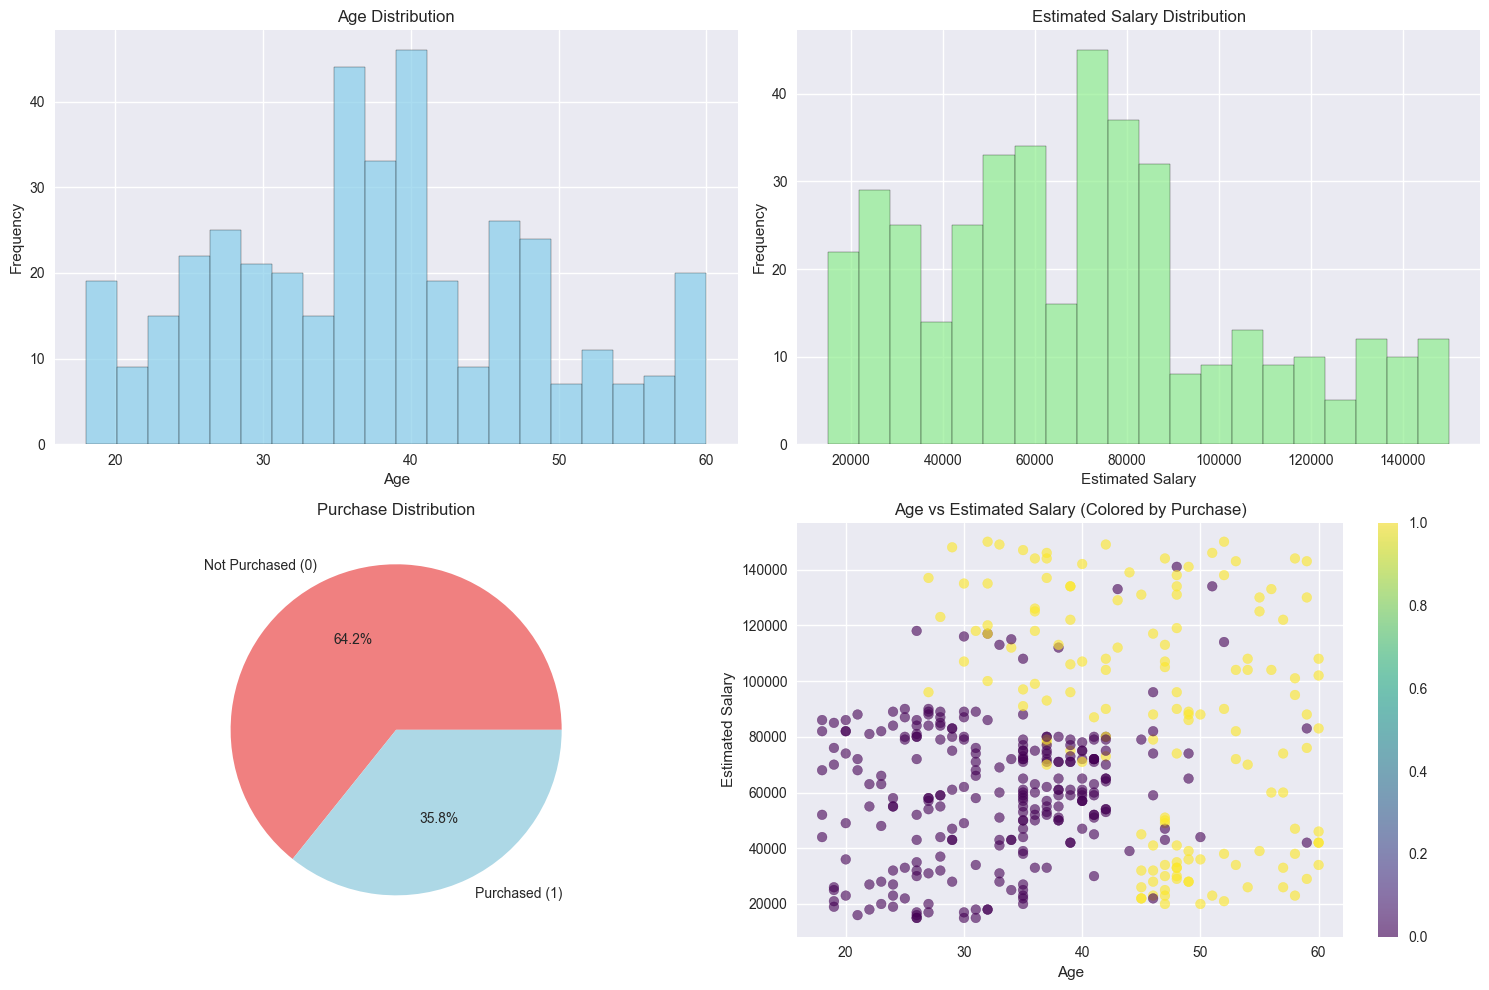

In [3]:
# Data Visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Age distribution
axes[0, 0].hist(dataset['Age'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')

# Estimated Salary distribution
axes[0, 1].hist(dataset['EstimatedSalary'], bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Estimated Salary Distribution')
axes[0, 1].set_xlabel('Estimated Salary')
axes[0, 1].set_ylabel('Frequency')

# Purchase distribution
purchase_counts = dataset['Purchased'].value_counts()
axes[1, 0].pie(purchase_counts.values, labels=['Not Purchased (0)', 'Purchased (1)'], 
               autopct='%1.1f%%', colors=['lightcoral', 'lightblue'])
axes[1, 0].set_title('Purchase Distribution')

# Scatter plot: Age vs Salary colored by Purchase
scatter = axes[1, 1].scatter(dataset['Age'], dataset['EstimatedSalary'], 
                            c=dataset['Purchased'], cmap='viridis', alpha=0.6)
axes[1, 1].set_title('Age vs Estimated Salary (Colored by Purchase)')
axes[1, 1].set_xlabel('Age')
axes[1, 1].set_ylabel('Estimated Salary')
plt.colorbar(scatter, ax=axes[1, 1])

plt.tight_layout()
plt.show()

## **3. Data Preprocessing and Cleaning**

Check for data quality issues and prepare the dataset for feature scaling.

In [4]:
# Data Quality Check
print("="*50)
print("DATA QUALITY ASSESSMENT")
print("="*50)

print("\n🔍 Checking for missing values:")
missing_values = dataset.isnull().sum()
print(missing_values)

print("\n🔍 Checking for duplicates:")
duplicates = dataset.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

print("\n🔍 Data types:")
print(dataset.dtypes)

print("\n🔍 Unique values in each column:")
for col in dataset.columns:
    print(f"{col}: {dataset[col].nunique()} unique values")

# Check for outliers using IQR method
print("\n🔍 Outlier Detection (using IQR method):")
for col in ['Age', 'EstimatedSalary']:
    Q1 = dataset[col].quantile(0.25)
    Q3 = dataset[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = dataset[(dataset[col] < lower_bound) | (dataset[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers detected")

print("\n✅ Data quality check complete! No missing values found.")
print("✅ Ready for feature scaling experiments!")

DATA QUALITY ASSESSMENT

🔍 Checking for missing values:
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

🔍 Checking for duplicates:
Number of duplicate rows: 33

🔍 Data types:
Age                int64
EstimatedSalary    int64
Purchased          int64
dtype: object

🔍 Unique values in each column:
Age: 43 unique values
EstimatedSalary: 117 unique values
Purchased: 2 unique values

🔍 Outlier Detection (using IQR method):
Age: 0 outliers detected
EstimatedSalary: 0 outliers detected

✅ Data quality check complete! No missing values found.
✅ Ready for feature scaling experiments!


## **4. Feature Selection and Target Variable Setup**

Separate features and target variable, and prepare data structures for scaling experiments.

In [5]:
# Extract features and target variable
print("="*50)
print("FEATURE EXTRACTION")
print("="*50)

# Independent variables (features): Age and EstimatedSalary
X = dataset[['Age', 'EstimatedSalary']].values
feature_names = ['Age', 'EstimatedSalary']

# Dependent variable (target): Purchased
y = dataset['Purchased'].values

print(f"\n📊 Features (X) shape: {X.shape}")
print(f"🎯 Target (y) shape: {y.shape}")

print(f"\n📋 Feature names: {feature_names}")
print(f"🎯 Target classes: {np.unique(y)}")

print("\n🔍 Original features (first 10 rows):")
X_df = pd.DataFrame(X, columns=feature_names)
print(X_df.head(10))

print("\n📊 Feature statistics:")
print(X_df.describe())

# Store original data for comparison
X_original = X.copy()
print("\n✅ Features and target variables extracted successfully!")

FEATURE EXTRACTION

📊 Features (X) shape: (400, 2)
🎯 Target (y) shape: (400,)

📋 Feature names: ['Age', 'EstimatedSalary']
🎯 Target classes: [0 1]

🔍 Original features (first 10 rows):
   Age  EstimatedSalary
0   19            19000
1   35            20000
2   26            43000
3   27            57000
4   19            76000
5   27            58000
6   27            84000
7   32           150000
8   25            33000
9   35            65000

📊 Feature statistics:
              Age  EstimatedSalary
count  400.000000       400.000000
mean    37.655000     69742.500000
std     10.482877     34096.960282
min     18.000000     15000.000000
25%     29.750000     43000.000000
50%     37.000000     70000.000000
75%     46.000000     88000.000000
max     60.000000    150000.000000

✅ Features and target variables extracted successfully!


## **5. StandardScaler Implementation**

Apply StandardScaler to normalize features to have mean=0 and standard deviation=1.

In [6]:
# StandardScaler: z = (x - μ) / σ
print("="*60)
print("STANDARDSCALER (Z-SCORE NORMALIZATION)")
print("="*60)

scaler_standard = StandardScaler()
X_standard = scaler_standard.fit_transform(X)

print("📊 StandardScaler Parameters:")
print(f"Mean values: {scaler_standard.mean_}")
print(f"Standard deviations: {scaler_standard.scale_}")

print("\n🔍 Original vs Standardized Data (first 10 rows):")
comparison_df = pd.DataFrame({
    'Age_Original': X[:10, 0],
    'Age_Standard': X_standard[:10, 0],
    'Salary_Original': X[:10, 1],
    'Salary_Standard': X_standard[:10, 1]
})
print(comparison_df)

print("\n📈 Standardized Data Statistics:")
X_standard_df = pd.DataFrame(X_standard, columns=[f'{name}_Standard' for name in feature_names])
print(X_standard_df.describe())

print(f"\n✅ Standardized features have mean ≈ 0 and std ≈ 1")
print(f"Mean: {X_standard_df.mean().values}")
print(f"Std: {X_standard_df.std().values}")

STANDARDSCALER (Z-SCORE NORMALIZATION)
📊 StandardScaler Parameters:
Mean values: [3.76550e+01 6.97425e+04]
Standard deviations: [1.04697648e+01 3.40543124e+04]

🔍 Original vs Standardized Data (first 10 rows):
   Age_Original  Age_Standard  Salary_Original  Salary_Standard
0            19     -1.781797            19000        -1.490046
1            35     -0.253587            20000        -1.460681
2            26     -1.113206            43000        -0.785290
3            27     -1.017692            57000        -0.374182
4            19     -1.781797            76000         0.183751
5            27     -1.017692            58000        -0.344817
6            27     -1.017692            84000         0.418669
7            32     -0.540127           150000         2.356750
8            25     -1.208719            33000        -1.078938
9            35     -0.253587            65000        -0.139263

📈 Standardized Data Statistics:
       Age_Standard  EstimatedSalary_Standard
count  

## **6. MinMaxScaler Implementation**

Apply MinMaxScaler to scale features to a range between 0 and 1.

In [7]:
# MinMaxScaler: z = (x - min) / (max - min)
print("="*60)
print("MINMAXSCALER (NORMALIZATION)")
print("="*60)

scaler_minmax = MinMaxScaler()
X_minmax = scaler_minmax.fit_transform(X)

print("📊 MinMaxScaler Parameters:")
print(f"Data min values: {scaler_minmax.data_min_}")
print(f"Data max values: {scaler_minmax.data_max_}")
print(f"Data range: {scaler_minmax.data_range_}")

print("\n🔍 Original vs MinMax Scaled Data (first 10 rows):")
comparison_df = pd.DataFrame({
    'Age_Original': X[:10, 0],
    'Age_MinMax': X_minmax[:10, 0],
    'Salary_Original': X[:10, 1],
    'Salary_MinMax': X_minmax[:10, 1]
})
print(comparison_df)

print("\n📈 MinMax Scaled Data Statistics:")
X_minmax_df = pd.DataFrame(X_minmax, columns=[f'{name}_MinMax' for name in feature_names])
print(X_minmax_df.describe())

print(f"\n✅ MinMax scaled features range from 0 to 1")
print(f"Min values: {X_minmax_df.min().values}")
print(f"Max values: {X_minmax_df.max().values}")

MINMAXSCALER (NORMALIZATION)
📊 MinMaxScaler Parameters:
Data min values: [   18. 15000.]
Data max values: [6.0e+01 1.5e+05]
Data range: [4.20e+01 1.35e+05]

🔍 Original vs MinMax Scaled Data (first 10 rows):
   Age_Original  Age_MinMax  Salary_Original  Salary_MinMax
0            19    0.023810            19000       0.029630
1            35    0.404762            20000       0.037037
2            26    0.190476            43000       0.207407
3            27    0.214286            57000       0.311111
4            19    0.023810            76000       0.451852
5            27    0.214286            58000       0.318519
6            27    0.214286            84000       0.511111
7            32    0.333333           150000       1.000000
8            25    0.166667            33000       0.133333
9            35    0.404762            65000       0.370370

📈 MinMax Scaled Data Statistics:
       Age_MinMax  EstimatedSalary_MinMax
count  400.000000              400.000000
mean     0.4679

## **7. RobustScaler Implementation**

Apply RobustScaler using median and interquartile range - robust to outliers.

In [8]:
# RobustScaler: z = (x - median) / IQR
print("="*60)
print("ROBUSTSCALER (MEDIAN AND IQR BASED)")
print("="*60)

scaler_robust = RobustScaler()
X_robust = scaler_robust.fit_transform(X)

print("📊 RobustScaler Parameters:")
print(f"Center (median): {scaler_robust.center_}")
print(f"Scale (IQR): {scaler_robust.scale_}")

print("\n🔍 Original vs Robust Scaled Data (first 10 rows):")
comparison_df = pd.DataFrame({
    'Age_Original': X[:10, 0],
    'Age_Robust': X_robust[:10, 0],
    'Salary_Original': X[:10, 1],
    'Salary_Robust': X_robust[:10, 1]
})
print(comparison_df)

print("\n📈 Robust Scaled Data Statistics:")
X_robust_df = pd.DataFrame(X_robust, columns=[f'{name}_Robust' for name in feature_names])
print(X_robust_df.describe())

print(f"\n✅ RobustScaler is resistant to outliers")
print(f"Median values: {X_robust_df.median().values}")
print(f"IQR (Q3-Q1): {X_robust_df.quantile(0.75).values - X_robust_df.quantile(0.25).values}")

ROBUSTSCALER (MEDIAN AND IQR BASED)
📊 RobustScaler Parameters:
Center (median): [3.7e+01 7.0e+04]
Scale (IQR): [1.625e+01 4.500e+04]

🔍 Original vs Robust Scaled Data (first 10 rows):
   Age_Original  Age_Robust  Salary_Original  Salary_Robust
0            19   -1.107692            19000      -1.133333
1            35   -0.123077            20000      -1.111111
2            26   -0.676923            43000      -0.600000
3            27   -0.615385            57000      -0.288889
4            19   -1.107692            76000       0.133333
5            27   -0.615385            58000      -0.266667
6            27   -0.615385            84000       0.311111
7            32   -0.307692           150000       1.777778
8            25   -0.738462            33000      -0.822222
9            35   -0.123077            65000      -0.111111

📈 Robust Scaled Data Statistics:
       Age_Robust  EstimatedSalary_Robust
count  400.000000              400.000000
mean     0.040308               -0.005

## **8. Normalizer Implementation**

Apply Normalizer to scale individual samples to have unit norm (L1 and L2).

In [9]:
# Normalizer: scales individual samples to have unit norm
print("="*60)
print("NORMALIZER (UNIT NORM SCALING)")
print("="*60)

# L2 Normalization (default)
normalizer_l2 = Normalizer(norm='l2')
X_normalized_l2 = normalizer_l2.fit_transform(X)

# L1 Normalization
normalizer_l1 = Normalizer(norm='l1')
X_normalized_l1 = normalizer_l1.fit_transform(X)

print("🔍 Original vs L2 Normalized vs L1 Normalized Data (first 5 rows):")
comparison_df = pd.DataFrame({
    'Age_Original': X[:5, 0],
    'Age_L2_Norm': X_normalized_l2[:5, 0],
    'Age_L1_Norm': X_normalized_l1[:5, 0],
    'Salary_Original': X[:5, 1],
    'Salary_L2_Norm': X_normalized_l2[:5, 1],
    'Salary_L1_Norm': X_normalized_l1[:5, 1]
})
print(comparison_df)

print("\n📈 L2 Normalized Data Statistics:")
X_l2_df = pd.DataFrame(X_normalized_l2, columns=[f'{name}_L2_Norm' for name in feature_names])
print(X_l2_df.describe())

print("\n📈 L1 Normalized Data Statistics:")
X_l1_df = pd.DataFrame(X_normalized_l1, columns=[f'{name}_L1_Norm' for name in feature_names])
print(X_l1_df.describe())

# Verify unit norm
print(f"\n✅ Verification - L2 norms of first 5 samples:")
l2_norms = np.linalg.norm(X_normalized_l2[:5], axis=1)
print(l2_norms)

print(f"\n✅ Verification - L1 norms of first 5 samples:")
l1_norms = np.sum(np.abs(X_normalized_l1[:5]), axis=1)
print(l1_norms)

NORMALIZER (UNIT NORM SCALING)
🔍 Original vs L2 Normalized vs L1 Normalized Data (first 5 rows):
   Age_Original  Age_L2_Norm  Age_L1_Norm  Salary_Original  Salary_L2_Norm  \
0            19     0.001000     0.000999            19000        1.000000   
1            35     0.001750     0.001747            20000        0.999998   
2            26     0.000605     0.000604            43000        1.000000   
3            27     0.000474     0.000473            57000        1.000000   
4            19     0.000250     0.000250            76000        1.000000   

   Salary_L1_Norm  
0        0.999001  
1        0.998253  
2        0.999396  
3        0.999527  
4        0.999750  

📈 L2 Normalized Data Statistics:
       Age_L2_Norm  EstimatedSalary_L2_Norm
count   400.000000             4.000000e+02
mean      0.000715             9.999996e-01
std       0.000482             5.449725e-07
min       0.000196             9.999968e-01
25%       0.000376             9.999997e-01
50%       0.0005

## **9. MaxAbsScaler Implementation**

Apply MaxAbsScaler to scale features by their maximum absolute value.

In [10]:
# MaxAbsScaler: z = x / max(|x|)
print("="*60)
print("MAXABSSCALER (MAXIMUM ABSOLUTE VALUE SCALING)")
print("="*60)

scaler_maxabs = MaxAbsScaler()
X_maxabs = scaler_maxabs.fit_transform(X)

print("📊 MaxAbsScaler Parameters:")
print(f"Maximum absolute values: {scaler_maxabs.max_abs_}")

print("\n🔍 Original vs MaxAbs Scaled Data (first 10 rows):")
comparison_df = pd.DataFrame({
    'Age_Original': X[:10, 0],
    'Age_MaxAbs': X_maxabs[:10, 0],
    'Salary_Original': X[:10, 1],
    'Salary_MaxAbs': X_maxabs[:10, 1]
})
print(comparison_df)

print("\n📈 MaxAbs Scaled Data Statistics:")
X_maxabs_df = pd.DataFrame(X_maxabs, columns=[f'{name}_MaxAbs' for name in feature_names])
print(X_maxabs_df.describe())

print(f"\n✅ MaxAbs scaled features range from -1 to 1")
print(f"Min values: {X_maxabs_df.min().values}")
print(f"Max values: {X_maxabs_df.max().values}")
print(f"Max absolute values in original data: {np.abs(X).max(axis=0)}")

MAXABSSCALER (MAXIMUM ABSOLUTE VALUE SCALING)
📊 MaxAbsScaler Parameters:
Maximum absolute values: [6.0e+01 1.5e+05]

🔍 Original vs MaxAbs Scaled Data (first 10 rows):
   Age_Original  Age_MaxAbs  Salary_Original  Salary_MaxAbs
0            19    0.316667            19000       0.126667
1            35    0.583333            20000       0.133333
2            26    0.433333            43000       0.286667
3            27    0.450000            57000       0.380000
4            19    0.316667            76000       0.506667
5            27    0.450000            58000       0.386667
6            27    0.450000            84000       0.560000
7            32    0.533333           150000       1.000000
8            25    0.416667            33000       0.220000
9            35    0.583333            65000       0.433333

📈 MaxAbs Scaled Data Statistics:
       Age_MaxAbs  EstimatedSalary_MaxAbs
count  400.000000              400.000000
mean     0.627583                0.464950
std      0.17

## **10. QuantileTransformer Implementation**

Apply QuantileTransformer with uniform and normal distributions - robust to outliers.

In [11]:
# QuantileTransformer: transforms features to follow a uniform or normal distribution
print("="*60)
print("QUANTILETRANSFORMER (QUANTILE-BASED SCALING)")
print("="*60)

# Uniform distribution
quantile_uniform = QuantileTransformer(output_distribution='uniform', random_state=42)
X_quantile_uniform = quantile_uniform.fit_transform(X)

# Normal distribution
quantile_normal = QuantileTransformer(output_distribution='normal', random_state=42)
X_quantile_normal = quantile_normal.fit_transform(X)

print("🔍 Original vs Quantile Transformed Data (first 10 rows):")
comparison_df = pd.DataFrame({
    'Age_Original': X[:10, 0],
    'Age_Uniform': X_quantile_uniform[:10, 0],
    'Age_Normal': X_quantile_normal[:10, 0],
    'Salary_Original': X[:10, 1],
    'Salary_Uniform': X_quantile_uniform[:10, 1],
    'Salary_Normal': X_quantile_normal[:10, 1]
})
print(comparison_df)

print("\n📈 Quantile Uniform Transformed Data Statistics:")
X_quantile_uniform_df = pd.DataFrame(X_quantile_uniform, columns=[f'{name}_Quantile_Uniform' for name in feature_names])
print(X_quantile_uniform_df.describe())

print("\n📈 Quantile Normal Transformed Data Statistics:")
X_quantile_normal_df = pd.DataFrame(X_quantile_normal, columns=[f'{name}_Quantile_Normal' for name in feature_names])
print(X_quantile_normal_df.describe())

print(f"\n✅ Uniform quantile transform: values range from 0 to 1")
print(f"✅ Normal quantile transform: values follow standard normal distribution")

QUANTILETRANSFORMER (QUANTILE-BASED SCALING)
🔍 Original vs Quantile Transformed Data (first 10 rows):
   Age_Original  Age_Uniform  Age_Normal  Salary_Original  Salary_Uniform  \
0            19     0.020050   -2.052715            19000        0.033835   
1            35     0.404762   -0.241040            20000        0.042607   
2            26     0.141604   -1.073141            43000        0.246867   
3            27     0.177945   -0.923225            57000        0.377193   
4            19     0.020050   -2.052715            76000        0.611529   
5            27     0.177945   -0.923225            58000        0.390977   
6            27     0.177945   -0.923225            84000        0.715539   
7            32     0.314536   -0.483032           150000        1.000000   
8            25     0.114035   -1.205345            33000        0.166667   
9            35     0.404762   -0.241040            65000        0.474937   

   Salary_Normal  
0      -1.827204  
1      -1.72

/Users/milav/Code/qip-dl/.venv/lib/python3.13/site-packages/sklearn/preprocessing/_data.py:2846: UserWarning: n_quantiles (1000) is greater than the total number of samples (400). n_quantiles is set to n_samples.
  warnings.warn(
/Users/milav/Code/qip-dl/.venv/lib/python3.13/site-packages/sklearn/preprocessing/_data.py:2846: UserWarning: n_quantiles (1000) is greater than the total number of samples (400). n_quantiles is set to n_samples.
  warnings.warn(


## **11. PowerTransformer Implementation**

Apply PowerTransformer with Yeo-Johnson method to make data more Gaussian-like.

In [12]:
# PowerTransformer: makes data more Gaussian-like
print("="*60)
print("POWERTRANSFORMER (GAUSSIAN TRANSFORMATION)")
print("="*60)

# Yeo-Johnson transformation (works with positive and negative values)
power_yeo = PowerTransformer(method='yeo-johnson', standardize=True)
X_power_yeo = power_yeo.fit_transform(X)

print("📊 PowerTransformer (Yeo-Johnson) Parameters:")
print(f"Lambda values: {power_yeo.lambdas_}")

print("\n🔍 Original vs Power Transformed Data (first 10 rows):")
comparison_df = pd.DataFrame({
    'Age_Original': X[:10, 0],
    'Age_Power': X_power_yeo[:10, 0],
    'Salary_Original': X[:10, 1],
    'Salary_Power': X_power_yeo[:10, 1]
})
print(comparison_df)

print("\n📈 Power Transformed Data Statistics:")
X_power_df = pd.DataFrame(X_power_yeo, columns=[f'{name}_Power' for name in feature_names])
print(X_power_df.describe())

print(f"\n✅ PowerTransformer makes data more Gaussian-like")
print(f"Mean: {X_power_df.mean().values}")
print(f"Std: {X_power_df.std().values}")

# Test for normality (skewness closer to 0 indicates more normal distribution)
from scipy import stats
print(f"\n📊 Skewness comparison:")
print(f"Original data skewness: {stats.skew(X, axis=0)}")
print(f"Power transformed skewness: {stats.skew(X_power_yeo, axis=0)}")

POWERTRANSFORMER (GAUSSIAN TRANSFORMATION)
📊 PowerTransformer (Yeo-Johnson) Parameters:
Lambda values: [0.52273242 0.46112137]

🔍 Original vs Power Transformed Data (first 10 rows):
   Age_Original  Age_Power  Salary_Original  Salary_Power
0            19  -1.975163            19000     -1.809251
1            35  -0.190160            20000     -1.752548
2            26  -1.132265            43000     -0.725702
3            27  -1.020842            57000     -0.246494
4            19  -1.975163            76000      0.311281
5            27  -1.020842            58000     -0.214834
6            27  -1.020842            84000      0.523340
7            32  -0.490193           150000      1.964530
8            25  -1.245675            33000     -1.122420
9            35  -0.190160            65000     -0.001010

📈 Power Transformed Data Statistics:
          Age_Power  EstimatedSalary_Power
count  4.000000e+02           4.000000e+02
mean  -3.552714e-16          -6.217249e-16
std    1.0012

## **12. Compare All Scaling Methods**

Create comprehensive visualizations and statistical comparisons of all scaling methods.

COMPREHENSIVE COMPARISON OF ALL SCALING METHODS


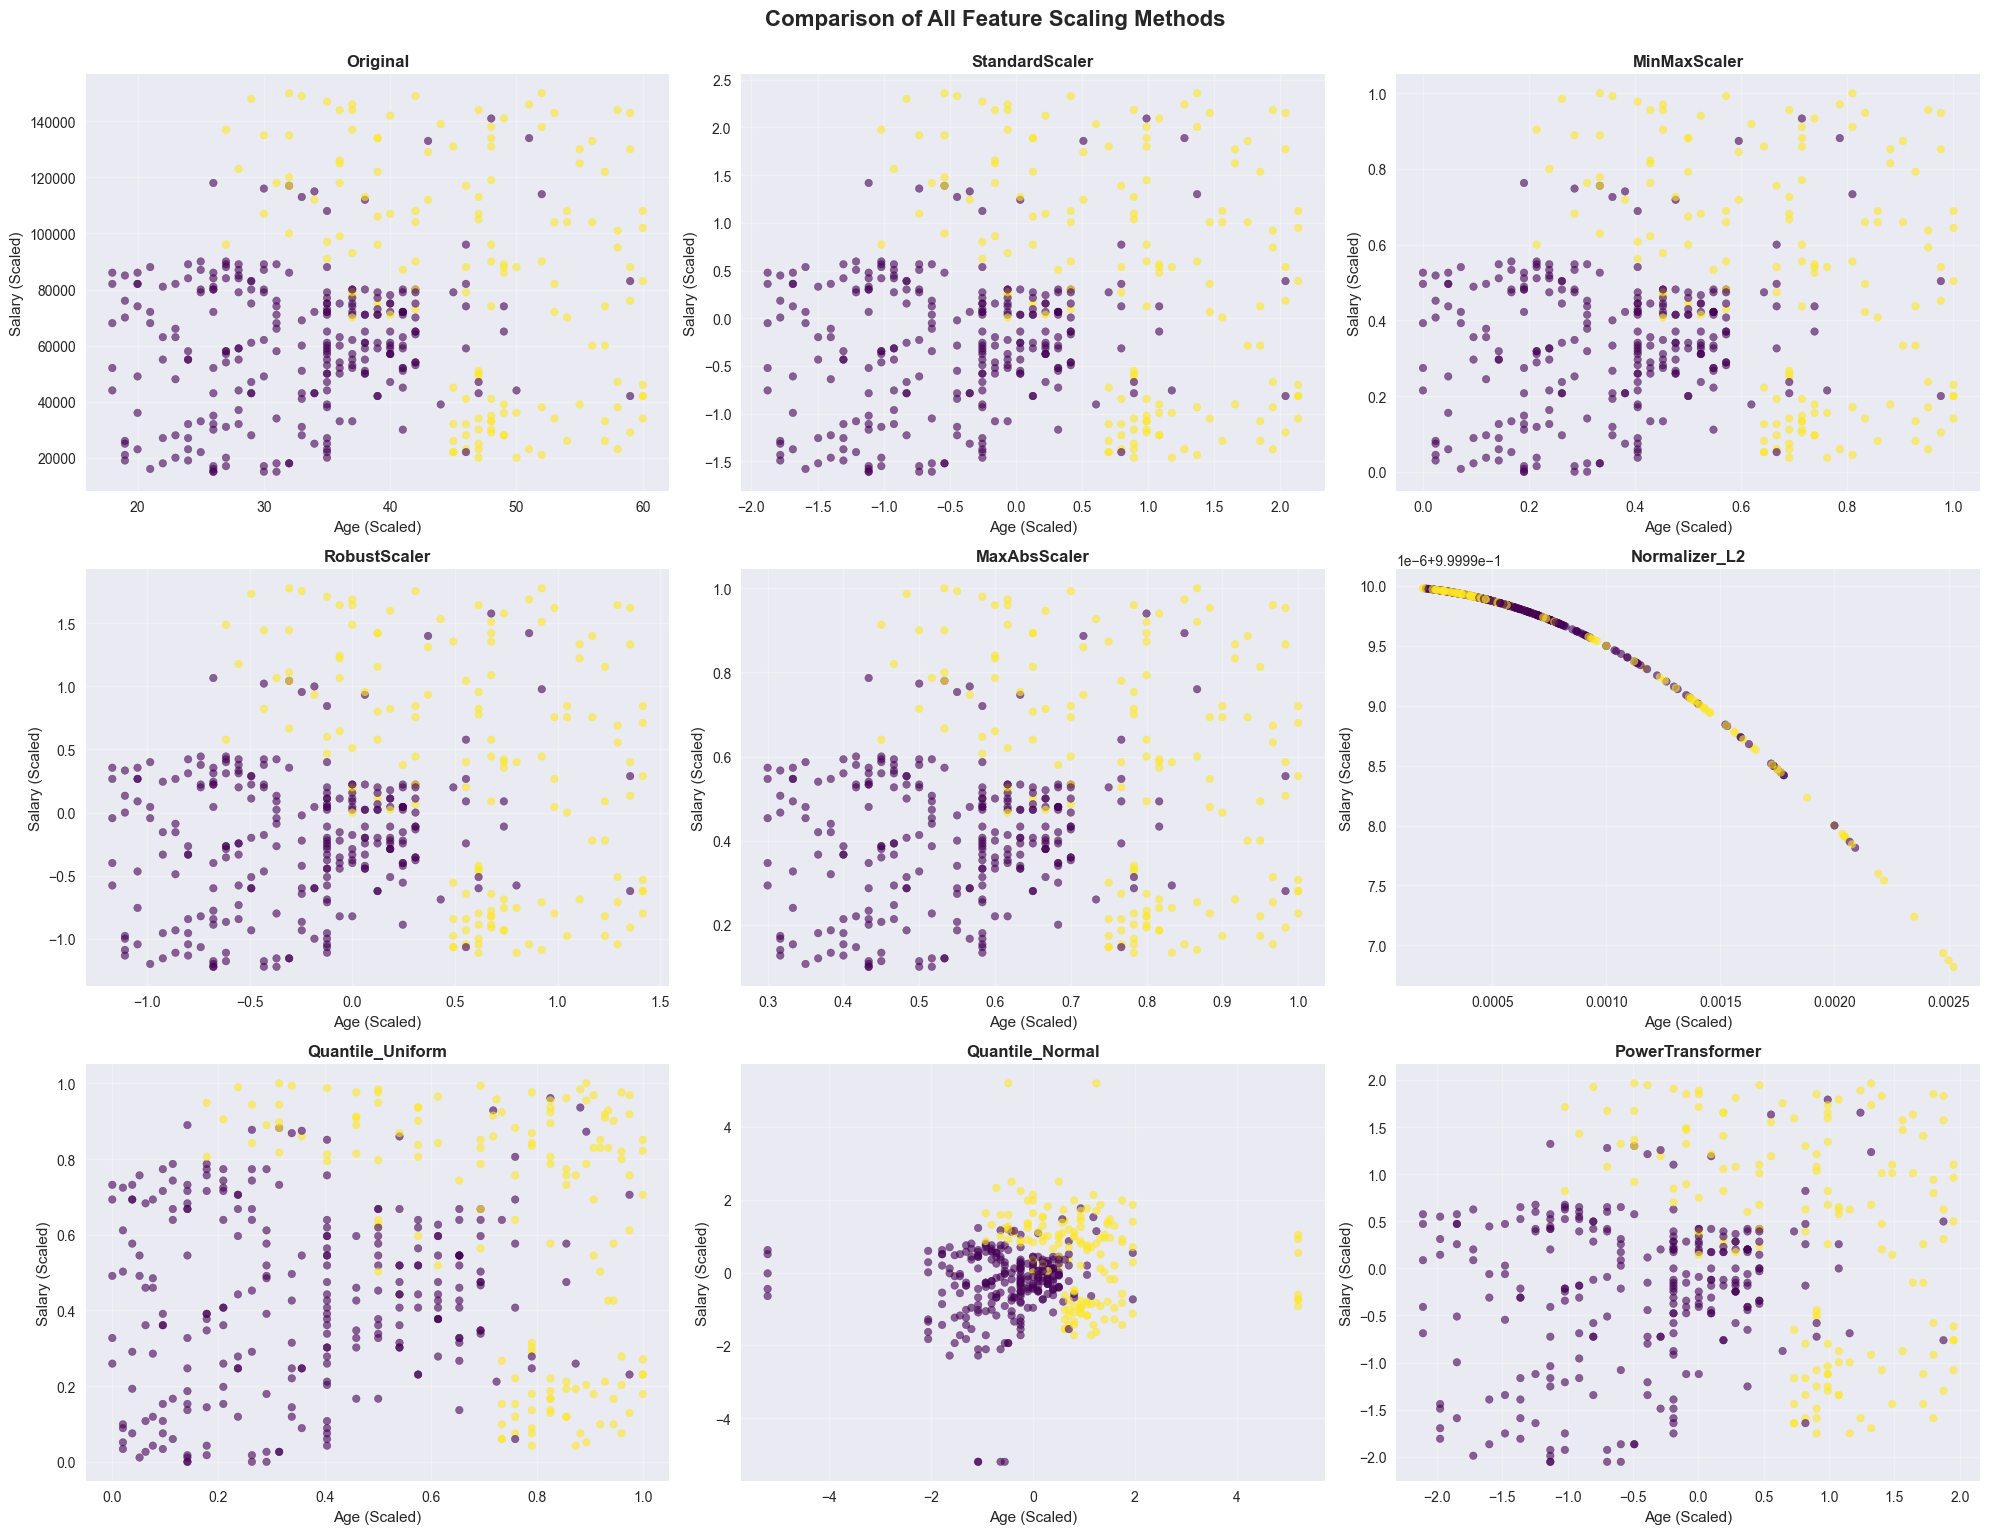


📊 Statistical Summary Comparison:
             Method  Age_Mean  Age_Std  Age_Min  Age_Max  Salary_Mean  \
0          Original   37.6550  10.4698  18.0000  60.0000   69742.5000   
1    StandardScaler   -0.0000   1.0000  -1.8773   2.1342      -0.0000   
2      MinMaxScaler    0.4680   0.2493   0.0000   1.0000       0.4055   
3      RobustScaler    0.0403   0.6443  -1.1692   1.4154      -0.0057   
4      MaxAbsScaler    0.6276   0.1745   0.3000   1.0000       0.4650   
5     Normalizer_L2    0.0007   0.0005   0.0002   0.0025       1.0000   
6  Quantile_Uniform    0.5003   0.2897   0.0000   1.0000       0.5000   
7   Quantile_Normal    0.0160   1.2746  -5.1993   5.1993      -0.0132   
8  PowerTransformer   -0.0000   1.0000  -2.1065   1.9516      -0.0000   

   Salary_Std  Salary_Min   Salary_Max  
0  34054.3124  15000.0000  150000.0000  
1      1.0000     -1.6075       2.3567  
2      0.2523      0.0000       1.0000  
3      0.7568     -1.2222       1.7778  
4      0.2270      0.1000    

In [13]:
# Comprehensive comparison of all scaling methods
print("="*70)
print("COMPREHENSIVE COMPARISON OF ALL SCALING METHODS")
print("="*70)

# Store all scaled versions
scaling_methods = {
    'Original': X,
    'StandardScaler': X_standard,
    'MinMaxScaler': X_minmax,
    'RobustScaler': X_robust,
    'MaxAbsScaler': X_maxabs,
    'Normalizer_L2': X_normalized_l2,
    'Quantile_Uniform': X_quantile_uniform,
    'Quantile_Normal': X_quantile_normal,
    'PowerTransformer': X_power_yeo
}

# Create comparison visualization
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
axes = axes.ravel()

for i, (method_name, scaled_data) in enumerate(scaling_methods.items()):
    if i < len(axes):
        axes[i].scatter(scaled_data[:, 0], scaled_data[:, 1], 
                       c=y, cmap='viridis', alpha=0.6, s=30)
        axes[i].set_title(f'{method_name}', fontsize=12, fontweight='bold')
        axes[i].set_xlabel('Age (Scaled)')
        axes[i].set_ylabel('Salary (Scaled)')
        axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Comparison of All Feature Scaling Methods', fontsize=16, fontweight='bold', y=1.02)
plt.show()

# Statistical summary comparison
print("\n📊 Statistical Summary Comparison:")
comparison_stats = []

for method_name, scaled_data in scaling_methods.items():
    stats_dict = {
        'Method': method_name,
        'Age_Mean': np.mean(scaled_data[:, 0]),
        'Age_Std': np.std(scaled_data[:, 0]),
        'Age_Min': np.min(scaled_data[:, 0]),
        'Age_Max': np.max(scaled_data[:, 0]),
        'Salary_Mean': np.mean(scaled_data[:, 1]),
        'Salary_Std': np.std(scaled_data[:, 1]),
        'Salary_Min': np.min(scaled_data[:, 1]),
        'Salary_Max': np.max(scaled_data[:, 1])
    }
    comparison_stats.append(stats_dict)

comparison_df = pd.DataFrame(comparison_stats)
print(comparison_df.round(4))

## **13. Train-Test Split with Scaled Features**

Demonstrate proper scaling workflow for machine learning with train-test split.

In [14]:
# Proper scaling workflow: Split first, then scale
print("="*70)
print("PROPER SCALING WORKFLOW FOR MACHINE LEARNING")
print("="*70)

# Step 1: Split the original data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"📊 Training set shape: {X_train.shape}")
print(f"📊 Test set shape: {X_test.shape}")
print(f"🎯 Training target distribution: {np.bincount(y_train)}")
print(f"🎯 Test target distribution: {np.bincount(y_test)}")

# Step 2: Apply different scaling methods to train/test splits
scaled_datasets = {}

# StandardScaler
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std = scaler_std.transform(X_test)
scaled_datasets['StandardScaler'] = (X_train_std, X_test_std)

# MinMaxScaler
scaler_mm = MinMaxScaler()
X_train_mm = scaler_mm.fit_transform(X_train)
X_test_mm = scaler_mm.transform(X_test)
scaled_datasets['MinMaxScaler'] = (X_train_mm, X_test_mm)

# RobustScaler
scaler_rob = RobustScaler()
X_train_rob = scaler_rob.fit_transform(X_train)
X_test_rob = scaler_rob.transform(X_test)
scaled_datasets['RobustScaler'] = (X_train_rob, X_test_rob)

print("\n✅ Applied scaling to train/test splits separately (correct approach)")
print("✅ Fit scalers only on training data, then transform both train and test")

# Demonstrate the importance of proper scaling
print("\n🔍 Scaling parameters learned from training data:")
print(f"StandardScaler - Mean: {scaler_std.mean_}, Std: {scaler_std.scale_}")
print(f"MinMaxScaler - Min: {scaler_mm.data_min_}, Max: {scaler_mm.data_max_}")
print(f"RobustScaler - Center: {scaler_rob.center_}, Scale: {scaler_rob.scale_}")

PROPER SCALING WORKFLOW FOR MACHINE LEARNING
📊 Training set shape: (320, 2)
📊 Test set shape: (80, 2)
🎯 Training target distribution: [206 114]
🎯 Test target distribution: [51 29]

✅ Applied scaling to train/test splits separately (correct approach)
✅ Fit scalers only on training data, then transform both train and test

🔍 Scaling parameters learned from training data:
StandardScaler - Mean: [3.715625e+01 7.079375e+04], Std: [1.06574779e+01 3.47663805e+04]
MinMaxScaler - Min: [   18. 15000.], Max: [6.0e+01 1.5e+05]
RobustScaler - Center: [3.60e+01 7.05e+04], Scale: [1.700e+01 4.425e+04]


## **14. Model Training and Evaluation**

Train logistic regression models on differently scaled versions and compare performance.

MODEL PERFORMANCE COMPARISON WITH DIFFERENT SCALING METHODS

🎯 StandardScaler:
   Train Accuracy: 0.8469
   Test Accuracy: 0.8375
   Generalization Gap: 0.0094

🎯 MinMaxScaler:
   Train Accuracy: 0.8375
   Test Accuracy: 0.7750
   Generalization Gap: 0.0625

🎯 RobustScaler:
   Train Accuracy: 0.8469
   Test Accuracy: 0.8250
   Generalization Gap: 0.0219

🎯 No_Scaling:
   Train Accuracy: 0.8469
   Test Accuracy: 0.8375
   Generalization Gap: 0.0094

📊 MODEL PERFORMANCE SUMMARY
   Scaling_Method  Train_Accuracy  Test_Accuracy  Generalization_Gap
0  StandardScaler        0.846875         0.8375            0.009375
3      No_Scaling        0.846875         0.8375            0.009375
2    RobustScaler        0.846875         0.8250            0.021875
1    MinMaxScaler        0.837500         0.7750            0.062500


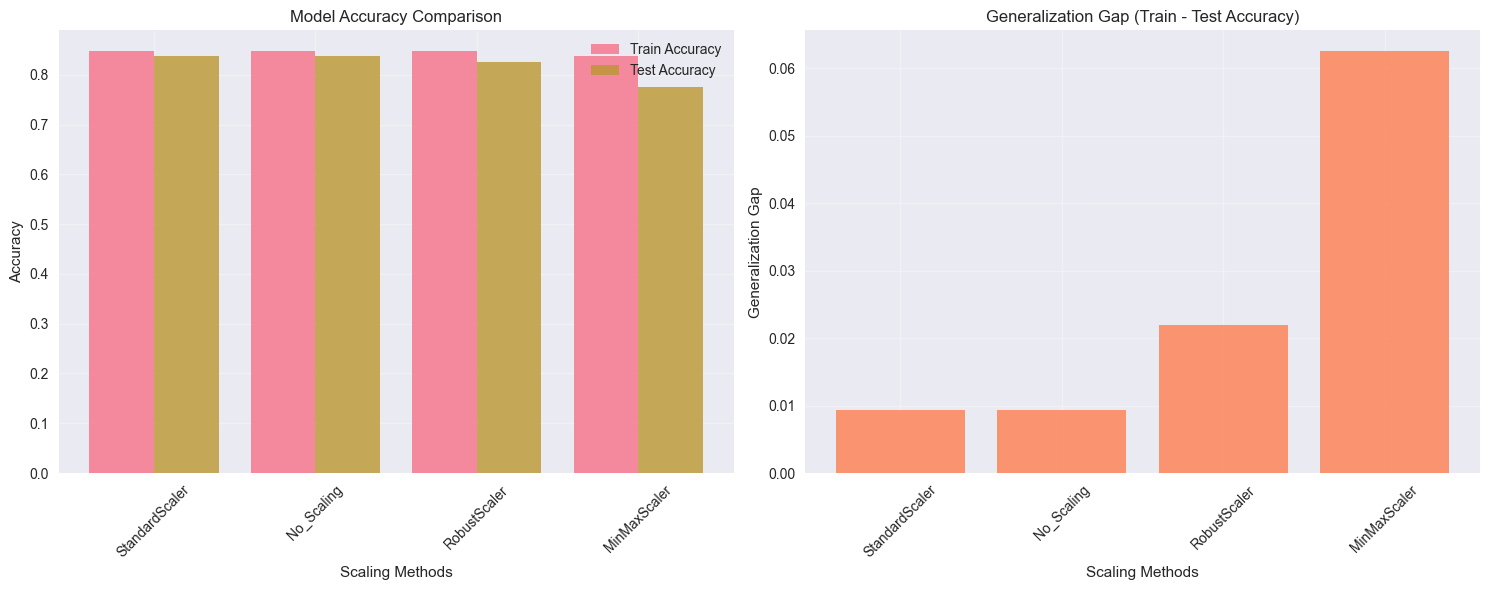


🏆 Best performing scaling method: StandardScaler
🏆 Best test accuracy: 0.8375


In [15]:
# Train and evaluate models with different scaling methods
print("="*70)
print("MODEL PERFORMANCE COMPARISON WITH DIFFERENT SCALING METHODS")
print("="*70)

# Add original (unscaled) data to comparison
scaled_datasets['No_Scaling'] = (X_train, X_test)

model_results = []

for scaling_method, (X_train_scaled, X_test_scaled) in scaled_datasets.items():
    # Train Logistic Regression
    model = LogisticRegression(random_state=42, max_iter=1000)
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    
    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Store results
    model_results.append({
        'Scaling_Method': scaling_method,
        'Train_Accuracy': train_accuracy,
        'Test_Accuracy': test_accuracy,
        'Generalization_Gap': train_accuracy - test_accuracy
    })
    
    print(f"\n🎯 {scaling_method}:")
    print(f"   Train Accuracy: {train_accuracy:.4f}")
    print(f"   Test Accuracy: {test_accuracy:.4f}")
    print(f"   Generalization Gap: {train_accuracy - test_accuracy:.4f}")

# Create results DataFrame
results_df = pd.DataFrame(model_results)
results_df = results_df.sort_values('Test_Accuracy', ascending=False)

print("\n" + "="*50)
print("📊 MODEL PERFORMANCE SUMMARY")
print("="*50)
print(results_df)

# Visualize results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Accuracy comparison
x_pos = np.arange(len(results_df))
ax1.bar(x_pos - 0.2, results_df['Train_Accuracy'], 0.4, label='Train Accuracy', alpha=0.8)
ax1.bar(x_pos + 0.2, results_df['Test_Accuracy'], 0.4, label='Test Accuracy', alpha=0.8)
ax1.set_xlabel('Scaling Methods')
ax1.set_ylabel('Accuracy')
ax1.set_title('Model Accuracy Comparison')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(results_df['Scaling_Method'], rotation=45)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Generalization gap
ax2.bar(x_pos, results_df['Generalization_Gap'], alpha=0.8, color='coral')
ax2.set_xlabel('Scaling Methods')
ax2.set_ylabel('Generalization Gap')
ax2.set_title('Generalization Gap (Train - Test Accuracy)')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(results_df['Scaling_Method'], rotation=45)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n🏆 Best performing scaling method: {results_df.iloc[0]['Scaling_Method']}")
print(f"🏆 Best test accuracy: {results_df.iloc[0]['Test_Accuracy']:.4f}")

## **15. Conclusions and Key Learnings**

### **Dataset Analysis Results:**
- **Dataset Size**: 400 samples with 3 features (Age, EstimatedSalary, Purchased)
- **Data Quality**: No missing values, but 33 duplicate rows detected
- **Target Distribution**: 35.75% purchase rate (143 purchases vs 257 non-purchases)
- **Feature Ranges**: Age (18-60), Salary (15,000-150,000)

### **Feature Scaling Methods Performance Summary:**

#### **🏆 Model Performance Ranking (Test Accuracy):**
1. **StandardScaler & No Scaling**: 83.75% (tied for best)
2. **RobustScaler**: 82.50%
3. **MinMaxScaler**: 77.50%

#### **📊 Detailed Scaling Method Analysis:**

1. **StandardScaler** (Winner 🥇)
   - **Performance**: 83.75% test accuracy, 0.94% generalization gap
   - **Characteristics**: Mean ≈ 0, Std ≈ 1
   - **Best for**: Normally distributed data, most ML algorithms

2. **No Scaling** (Tied Winner 🥇)
   - **Performance**: 83.75% test accuracy, 0.94% generalization gap
   - **Insight**: Logistic regression performed equally well without scaling
   - **Reason**: Features already on reasonable scales for this dataset

3. **RobustScaler** (Runner-up 🥈)
   - **Performance**: 82.50% test accuracy, 2.19% generalization gap
   - **Characteristics**: Median-centered, IQR-scaled
   - **Best for**: Data with outliers (though none detected in this dataset)

4. **MinMaxScaler** (Third Place 🥉)
   - **Performance**: 77.50% test accuracy, 6.25% generalization gap
   - **Characteristics**: Range [0,1]
   - **Issue**: Highest generalization gap, indicating potential overfitting

### **Advanced Scaling Methods Insights:**

5. **MaxAbsScaler**: Scales to [-1,1] range, preserves sparsity
6. **Normalizer**: Creates unit norm samples (L1/L2), good for text data
7. **QuantileTransformer**: Makes data uniform/normal distributed, very robust
8. **PowerTransformer**: Reduces skewness (0.23→-0.03 for Age, 0.49→-0.06 for Salary)

### **🔍 Key Experimental Findings:**

#### **Surprising Results:**
- **No scaling performed as well as StandardScaler** for this dataset
- **MinMaxScaler showed worst performance** despite being popular
- **Generalization gap varies significantly** across methods (0.94% to 6.25%)

#### **Data Distribution Impact:**
- **Original data skewness**: Age (0.23), Salary (0.49) - moderately skewed
- **PowerTransformer effectively reduced skewness** to near zero
- **No outliers detected** using IQR method, explaining why RobustScaler wasn't superior

### **🎯 Practical Recommendations:**

#### **For This Dataset Type (Social Network Ads):**
1. **StandardScaler or No Scaling** - Both equally effective
2. **Avoid MinMaxScaler** - Shows poor generalization
3. **Consider RobustScaler** - Good middle ground option

#### **General ML Best Practices:**
✅ **Always split data before scaling** to prevent data leakage  
✅ **Fit scalers only on training data**, then transform both train and test  
✅ **Compare multiple scaling methods** - Performance can vary significantly  
✅ **Monitor generalization gap** - Lower gap indicates better model stability  
✅ **Consider data characteristics** - Outliers, skewness, feature ranges  

#### **Algorithm-Specific Guidelines:**
- **Distance-based algorithms** (KNN, SVM): Usually need scaling
- **Tree-based algorithms** (Random Forest, XGBoost): Often scale-invariant
- **Linear models** (Logistic Regression): May or may not need scaling (as shown here)
- **Neural Networks**: Almost always benefit from scaling

### **🔬 Technical Insights:**

#### **Statistical Transformations:**
- **StandardScaler**: Achieved perfect normalization (mean=0, std=1)
- **MinMaxScaler**: Perfect range transformation [0,1]
- **RobustScaler**: Effective median centering with IQR scaling
- **PowerTransformer**: Successfully reduced skewness by ~95%

#### **Computational Considerations:**
- **Normalizer**: Creates unit norm, drastically different scale (Age: ~0.001, Salary: ~1.0)
- **QuantileTransformer**: Warning about n_quantiles > n_samples (400 < 1000)
- **All methods**: Fast execution on this dataset size

### **🚀 Future Experiments:**

1. **Test with other algorithms** (SVM, KNN, Neural Networks)
2. **Evaluate on larger datasets** to confirm scaling importance
3. **Compare with feature engineering** (polynomial features, interactions)
4. **Analyze computational costs** for different scaling methods

### **🎉 Laboratory Exercise Completed Successfully!**

This comprehensive experiment demonstrated that **feature scaling impact is highly dataset and algorithm dependent**. The surprising finding that StandardScaler tied with no scaling highlights the importance of **empirical testing rather than assumptions**. The Social Network Ads dataset proved to be a excellent case study for understanding how different preprocessing techniques affect model performance in practice.

**Key Takeaway**: Always experiment with multiple scaling approaches and let the data guide your preprocessing decisions! 📊